In [1]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, TimeSeriesSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, make_scorer
from sklearn.model_selection import learning_curve
from sklearn.multioutput import MultiOutputClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from evaluate import run, evaluate_result
import datetime
#from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
data_transformed = pd.read_csv('output/loan_dev_transformed.csv')
competition_transformed = pd.read_csv('output/loan_comp_transformed.csv')
data = pd.read_csv('output/loan_dev.csv')
competition = pd.read_csv('output/loan_comp.csv')
data_transformed

,Id,loan_date,loan_duration,loan_payments,Predicted,account_frequency,account_district_region,account_district_no_inhabitants,account_district_no_municipalities_0_499,account_district_no_municipalities_500_1999,...,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent,owner_profile
0,5314,930705,12,1.772411,1.0,1,7,-0.555052,-0.696637,-0.532164,...,-2.341062,-1.095832,-1.277012,-3.548971,2.064417,0,0.738673,-1.637968,0,2
1,5316,930711,36,0.209593,0.0,2,3,-0.276803,0.251722,-0.103896,...,0.662960,0.445111,0.304714,0.259442,0.870102,1,-0.939421,-1.451810,0,2
2,6863,930728,60,-0.928164,0.0,2,3,-0.907746,1.315032,-0.165077,...,-0.997871,-0.973106,-1.279854,-0.405514,0.362060,1,1.697584,-1.265651,0,2
3,5325,930803,36,-0.553325,0.0,2,2,-0.344741,1.286294,0.446734,...,-0.150482,-0.193451,-0.489775,-0.135044,0.842490,0,1.377947,-1.079493,0,2
4,7240,930906,60,0.195440,0.0,1,4,1.729778,-1.127709,-1.327519,...,1.047898,1.926310,1.743982,1.716445,0.944229,1,-1.738513,-1.079493,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,961212,48,-0.414986,0.0,2,1,0.598928,-0.208089,1.731539,...,0.068220,-1.137214,-1.012047,-1.070137,-0.537260,0,-0.859512,1.899044,1,2
324,5625,961215,60,-0.204510,1.0,2,7,-2.110760,0.366674,-0.715708,...,0.900256,0.595847,0.285059,0.536220,0.540540,1,1.697584,0.037459,0,2
325,6805,961221,48,-1.466909,0.0,2,1,0.822776,-1.127709,-1.205157,...,-0.097886,-0.313022,-0.621863,-0.182382,0.514984,0,0.259218,-0.893334,0,2
326,7233,961225,36,-0.426400,0.0,2,6,-0.570905,0.998913,-0.042715,...,1.007047,0.910852,0.869015,0.695252,-0.583636,1,0.578855,1.340569,0,2


In [3]:
data.columns

Index(['Id', 'loan_date', 'loan_duration', 'loan_payments', 'Predicted',
       'account_frequency', 'account_district_region',
       'account_district_no_inhabitants',
       'account_district_no_municipalities_0_499',
       'account_district_no_municipalities_500_1999',
       'account_district_no_municipalities_2000_9999',
       'account_district_no_municipalities_10000_plus',
       'account_district_no_cities',
       'account_district_ratio_urban_inhabitants',
       'account_district_average_salary',
       'account_district_unemployment_rate_95',
       'account_district_unemployment_rate_96',
       'account_district_no_enterpreneurs_per_1000_inhabitants',
       'account_district_no_crimes_95', 'account_district_no_crimes_96',
       'owner_card_type', 'owner_district_region',
       'owner_district_no_inhabitants',
       'owner_district_no_municipalities_0_499',
       'owner_district_no_municipalities_500_1999',
       'owner_district_no_municipalities_2000_9999',
     

In [4]:
competition

,Id,loan_date,loan_duration,loan_payments,Predicted,account_frequency,account_district_region,account_district_no_inhabitants,account_district_no_municipalities_0_499,account_district_no_municipalities_500_1999,...,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent,owner_profile
0,5895,970103,60,1566,NaN,2,3,11.263399,85,19,...,54520.202247,8051.737079,12769.220000,5653.016949,556.725843,1,34,14,0,2
1,7122,970104,36,7240,NaN,2,7,10.975071,65,16,...,31518.182051,6935.733333,9526.772414,5402.261224,148.276923,0,47,16,0,2
2,6173,970108,48,4845,NaN,0,6,12.087773,69,27,...,40175.612500,7217.385795,15302.486047,4603.406015,259.965341,0,57,20,0,2
3,6142,970121,60,3698,NaN,2,2,11.306442,61,23,...,44440.912676,6430.809859,11797.642857,4176.740000,548.077465,0,53,10,1,2
4,5358,970121,12,3210,NaN,2,3,11.471134,87,25,...,20231.313158,2373.266667,2736.026923,2069.016129,122.757895,1,57,19,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4989,981205,48,7348,NaN,2,6,11.545848,87,16,...,30797.487500,8582.460714,8806.779310,8341.525926,538.846429,0,47,16,0,1
350,5221,981205,12,4376,NaN,2,0,11.964269,49,70,...,59684.298851,12491.751724,14839.705263,10670.889796,471.668966,1,53,17,0,2
351,5346,981206,24,2318,NaN,2,1,12.561601,0,2,...,29645.320175,6040.260526,7270.390000,5079.221875,337.274561,1,49,21,0,2
352,6402,981206,24,5812,NaN,1,2,11.228332,55,26,...,46755.305769,13016.101923,17969.630769,10043.984615,461.121154,1,29,18,0,2


In [5]:
# These columns will be used as the inputs of the models
input_cols = [
'loan_date',
'loan_duration',
'loan_payments',
#'account_frequency',
'account_district_region',
'account_district_no_inhabitants',
'account_district_no_municipalities_0_499',
'account_district_no_municipalities_500_1999',
'account_district_no_municipalities_2000_9999',
'account_district_no_municipalities_10000_plus',
'account_district_no_cities',
'account_district_ratio_urban_inhabitants',
'account_district_average_salary',
'account_district_unemployment_rate_95',
'account_district_unemployment_rate_96',
'account_district_no_enterpreneurs_per_1000_inhabitants',
'account_district_no_crimes_95',
'account_district_no_crimes_96',
'owner_card_type',
#'owner_district_region',
#'owner_district_no_inhabitants',
#'owner_district_no_municipalities_0_499',
#'owner_district_no_municipalities_500_1999',
#'owner_district_no_municipalities_2000_9999',
#'owner_district_no_municipalities_10000_plus',
#'owner_district_no_cities',
#'owner_district_ratio_urban_inhabitants',
#'owner_district_average_salary',
#'owner_district_unemployment_rate_95',
#'owner_district_unemployment_rate_96',
#'owner_district_no_enterpreneurs_per_1000_inhabitants',
#'owner_district_no_crimes_95',
#'owner_district_no_crimes_96',
'count_trans_credits',
'count_trans_withdrawals',
'count_trans_credit_cash',
'count_trans_withdrawal_cash',
'count_trans_withdrawal_card',
'count_trans_collection_other_bank',
'count_trans_remittance_other_bank',
'count_trans_ksymbol_interest_credited',
'count_trans_ksymbol_household',
'count_trans_ksymbol_payment_for_statement',
'count_trans_ksymbol_insurance_payment',
'count_trans_ksymbol_sanction_interest_if_negative_balance',
'count_trans_ksymbol_oldage_pension',
'last_trans_balance',
'mean_trans_balance',
'mean_trans_amount_absolute',
'mean_trans_amount_credit',
'mean_trans_amount_withdrawal',
'mean_trans_amount_signed',
'owner_male',
'owner_age',
'account_age_months',
'has_disponent',
#'owner_profile'
]


# The output columns are the genres
output_cols = 'Predicted'

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
data.head()


,Id,loan_date,loan_duration,loan_payments,Predicted,account_frequency,account_district_region,account_district_no_inhabitants,account_district_no_municipalities_0_499,account_district_no_municipalities_500_1999,account_district_no_municipalities_2000_9999,account_district_no_municipalities_10000_plus,account_district_no_cities,account_district_ratio_urban_inhabitants,account_district_average_salary,account_district_unemployment_rate_95,account_district_unemployment_rate_96,account_district_no_enterpreneurs_per_1000_inhabitants,account_district_no_crimes_95,account_district_no_crimes_96,owner_card_type,owner_district_region,owner_district_no_inhabitants,owner_district_no_municipalities_0_499,owner_district_no_municipalities_500_1999,owner_district_no_municipalities_2000_9999,owner_district_no_municipalities_10000_plus,owner_district_no_cities,owner_district_ratio_urban_inhabitants,owner_district_average_salary,owner_district_unemployment_rate_95,owner_district_unemployment_rate_96,owner_district_no_enterpreneurs_per_1000_inhabitants,owner_district_no_crimes_95,owner_district_no_crimes_96,count_trans_credits,count_trans_withdrawals,count_trans_credit_cash,count_trans_withdrawal_cash,count_trans_withdrawal_card,count_trans_collection_other_bank,count_trans_remittance_other_bank,count_trans_ksymbol_interest_credited,count_trans_ksymbol_household,count_trans_ksymbol_payment_for_statement,count_trans_ksymbol_insurance_payment,count_trans_ksymbol_sanction_interest_if_negative_balance,count_trans_ksymbol_oldage_pension,last_trans_balance,mean_trans_balance,mean_trans_amount_absolute,mean_trans_amount_credit,mean_trans_amount_withdrawal,mean_trans_amount_signed,owner_male,owner_age,account_age_months,has_disponent,owner_profile
0,5314,930705,12,8033,1.0,1,7,11.459651,15,13,8,2,10,0.818,9.174713,0.0338,0.0367,0.100,0.031483,0.029574,0,7,94812,15,13,8,2,10,0.818,9650,0.0338,0.0367,0.100,0.031483,0.029574,4,0,4,0,0,0,0,0,0,0,0,0,0,20100.0,12250.000000,5025.000000,5025.000000,0.00,5025.000000,0,45,3,0,2
1,5316,930711,36,4610,0.0,2,3,11.632565,48,20,7,3,10,0.735,9.032290,0.0179,0.0231,0.117,0.025322,0.023228,0,3,112709,48,20,7,3,10,0.735,8369,0.0179,0.0231,0.117,0.025322,0.023228,17,20,12,12,0,0,8,5,2,3,0,0,0,52208.9,52083.859459,11015.635135,13523.158824,8884.24,1411.051351,1,24,4,0,2
2,6863,930728,60,2118,0.0,2,3,11.263399,85,19,6,1,5,0.535,9.034796,0.0228,0.0289,0.132,0.026695,0.027234,0,3,77917,85,19,6,1,5,0.535,8390,0.0228,0.0289,0.132,0.026695,0.027234,15,9,2,6,0,5,3,8,1,0,0,0,0,20272.8,30060.954167,5417.458333,5009.733333,6097.00,844.708333,1,57,5,0,2
3,5325,930803,36,2939,0.0,2,2,11.588682,84,29,6,1,6,0.580,9.077266,0.0383,0.0431,0.137,0.035265,0.035858,0,6,177686,69,27,10,1,9,0.748,10045,0.0142,0.0171,0.135,0.037167,0.035428,13,12,2,10,0,6,2,5,2,2,0,0,0,34307.3,41297.480000,8253.080000,9254.600000,7168.10,1371.704000,0,53,6,0,2
4,7240,930906,60,4579,0.0,1,4,14.001951,0,0,0,1,1,1.000,9.436759,0.0029,0.0043,0.167,0.071104,0.082250,0,0,86513,38,36,5,1,5,0.505,8288,0.0379,0.0452,0.110,0.018055,0.016876,13,14,1,11,0,6,3,6,1,2,0,0,0,41112.9,57188.211111,18945.966667,21255.930769,16801.00,1522.707407,1,14,6,0,0


In [7]:
data.isnull().any()

Id                    False
loan_date             False
loan_duration         False
loan_payments         False
Predicted             False
                      ...  
owner_male            False
owner_age             False
account_age_months    False
has_disponent         False
owner_profile         False
Length: 59, dtype: bool

In [8]:
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from imblearn.pipeline import Pipeline

def plot_learning_curve(
    title,
    train_sizes, 
    train_scores, 
    test_scores, 
    fit_times,
    score_times,
    axes=None,
    ylim=None,
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    axes = axes.reshape(-1)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig = fig.delaxes(axes[-1])
    
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    # Plot n_samples vs score_times
    axes[3].grid()
    axes[3].plot(train_sizes, score_times_mean, "o-")
    axes[3].fill_between(
        train_sizes,
        score_times_mean - score_times_std,
        score_times_mean + score_times_std,
        alpha=0.1,
    )
    axes[3].set_xlabel("Training examples")
    axes[3].set_ylabel("score_times")
    axes[3].set_title("Scalability of the model")

    # Plot score_time vs score
    score_time_argsort = score_times_mean.argsort()
    score_time_sorted = score_times_mean[score_time_argsort]
    test_scores_mean_sorted = test_scores_mean[score_time_argsort]
    test_scores_std_sorted = test_scores_std[score_time_argsort]
    axes[4].grid()
    axes[4].plot(score_time_sorted, test_scores_mean_sorted, "o-")
    axes[4].fill_between(
        score_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[4].set_xlabel("score_times")
    axes[4].set_ylabel("Score")
    axes[4].set_title("Performance of the model")

    return plt



In [20]:

# The following helper functions are for training and evaluating the model

def show_confusion_matrix(cms, target_names, output_labels, title):
    """
    This helper function plots the confusion matrices calculated when evaluating the model.
    """
    fig, ax = plt.subplots(figsize=(4,4))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    gnames = ["True Negative", "False Positive", "False Negative", "True Positive"]
    gcounts = [f"{v:0.0f}" for v in cms.flatten()]
    gpercentages = [f"{v:.2%}" for v in cms.flatten()/np.sum(cms)]
    annot = np.asarray([f"{name}\n{count}\n{percentage}" for name, count, percentage in zip(gnames, gcounts, gpercentages)]).reshape(2, 2)

    sns.heatmap(cms, ax=ax, annot=annot, fmt="", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    ax.set_title(title)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

def evaluate_model(model, testing_inputs, testing_classes, output_cols, sample_weight=None):
    """
    This helper function prints the report and evaluation metrics for the model.
    """
    predictions = model.predict(testing_inputs)
    predictions_prob = (model.predict_proba(testing_inputs))[:, 1]

    print("="*70)
    print(f"Evaluation metrics for {model.__class__.__name__}")
    print("="*70)

    score = model.score(testing_inputs, testing_classes) 
    print(f"{model.__class__.__name__}'s default score metric: {score}")


    print("Classification report")
    print(
        classification_report(testing_classes, predictions, sample_weight=sample_weight, digits=4, zero_division=1)
    )

    accuracy = accuracy_score(testing_classes, predictions, sample_weight=sample_weight)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {roc_auc_score(testing_classes, predictions_prob, sample_weight=sample_weight):.4f}")

    cms = confusion_matrix(testing_classes, predictions, sample_weight=sample_weight)
    show_confusion_matrix(cms, ['no', 'yes'], output_cols, f"Confusion matrices for {model.__class__.__name__}")

    print("="*70)

def train_and_evaluate(input_cols, output_cols, model, params, scoring, n_iter=None, sample_weight=None, random_state=42, plot_roc=True, transformed = False, oversample=False):
    """
    This function trains the model and prints the evaluation metrics, as well as the confusion matrices, and learning and scalability plots.
    """
    inputs = data[input_cols].values
    classes = data[output_cols].values
    
    if (transformed):
        inputs = data_transformed[input_cols].values
        classes = data_transformed[output_cols].values
    
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(inputs, classes, test_size=0.2, shuffle=False, random_state=random_state)
    
    pipeline = Pipeline([('model', model)])
    
    if (oversample):
        pipeline = Pipeline([
            ('resampler', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
            ('model', model)
        ])
    
    scoring = make_scorer(roc_auc_score, needs_proba=True)

    if n_iter == None:
        clf = GridSearchCV(pipeline, params, n_jobs=-1, scoring=scoring, verbose=0)
    else:
       clf = RandomizedSearchCV(
            pipeline, params, n_iter=n_iter, scoring=scoring,
            n_jobs=-1, random_state=random_state, verbose=0)

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        clf, training_inputs, training_classes, return_times=True, cv=5, n_jobs=-1, random_state=random_state)

    plot_learning_curve(f"Learning curves for {model.__class__.__name__}",
        train_sizes, train_scores, test_scores, fit_times, score_times)
    
    resclf = clf.fit(training_inputs, training_classes)

    if plot_roc:
        RocCurveDisplay.from_estimator(resclf, testing_inputs, testing_classes)
        plt.show()

    if isinstance(model, DecisionTreeClassifier):
        plot_tree(resclf.best_estimator_['model'], feature_names=input_cols)
        plt.savefig(f'output/{model.__class__.__name__}_tree_diagram.svg')
    
    print(f"Best params for {model.__class__.__name__}: {clf.best_params_}")
        
    evaluate_model(clf, testing_inputs, testing_classes, output_cols, sample_weight=sample_weight)
    return resclf.best_estimator_['model']

def predict_model(model, transformed = False):
    """
    A more convenient wrapper around train_and_evaluate, albeit less general.
    """
    inputs = competition[input_cols].values
    results = competition[['Id', 'Predicted']].copy()
    if (transformed):
        inputs = competition_transformed[input_cols].values
        results = competition_transformed[['Id', 'Predicted']].copy()
    
    results['Predicted'] = (model.predict_proba(inputs))[:, 1]
    modelname = f'{datetime.datetime.now().strftime("%Y_%m_%d_T%HH_%MM_%SS")}_{model.__class__.__name__}_results'
    results.to_csv(f'output/predictive/{modelname}.csv', index=False)
    run(modelname)
    return model

def train_and_use_model(model, params, scoring='roc_auc', n_iter=None, sample_weight=None, random_state=42, plot_roc=True, transformed = False, oversample=False):
    """
    A more convenient wrapper around train_and_evaluate, albeit less general.
    """
    clf = train_and_evaluate(input_cols, output_cols, model, params, sample_weight=sample_weight, n_iter=n_iter, random_state=random_state, scoring=scoring, plot_roc=plot_roc, oversample=oversample)
    return predict_model(clf, transformed = transformed)

def use_model(clf, oversample = False, transformed = False):
    inputs = data[input_cols].values
    classes = data[output_cols].values
    
    if (transformed):
        inputs = data_transformed[input_cols].values
        classes = data_transformed[output_cols].values
    
    if (oversample):
        resampler = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
        inputs, classes = resampler.fit_resample(inputs, classes)
    
    clf.fit(inputs, classes)
    return predict_model(clf, transformed=transformed)


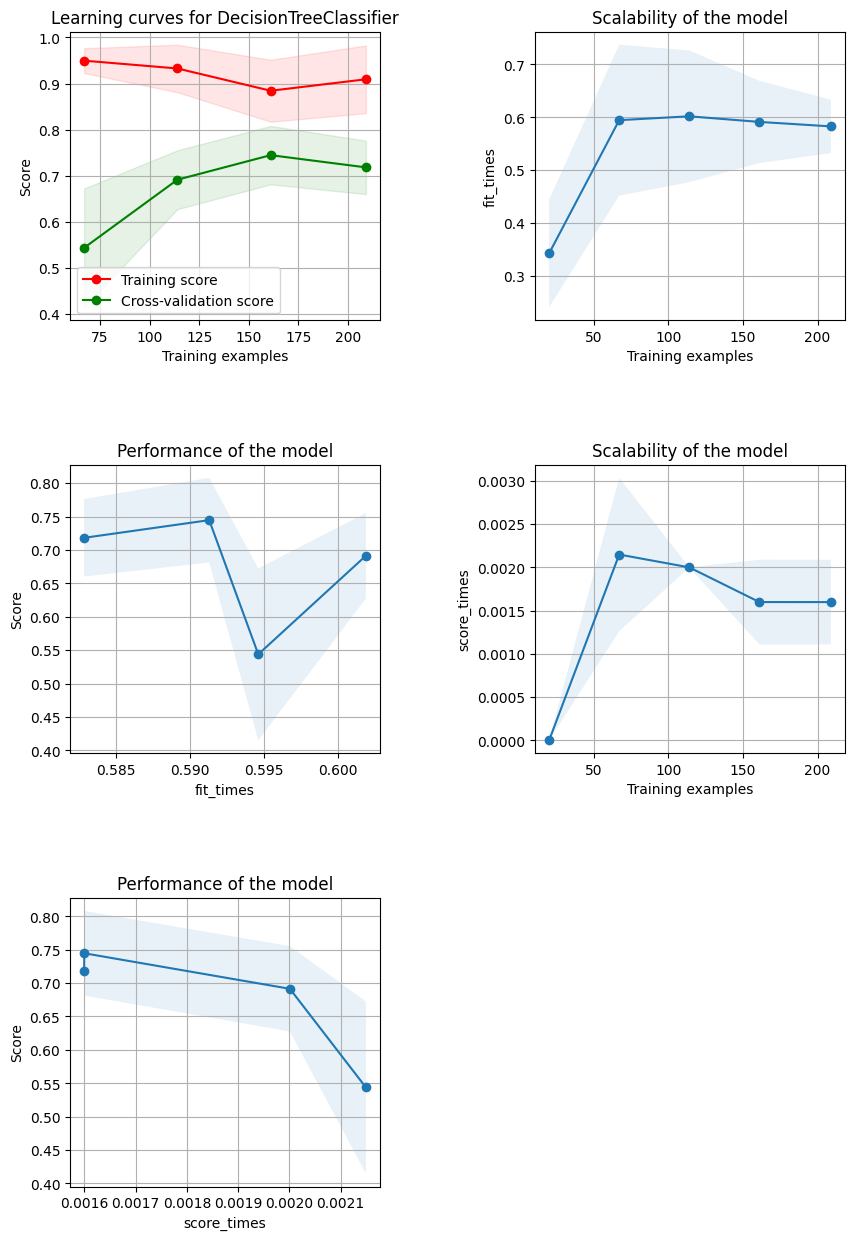

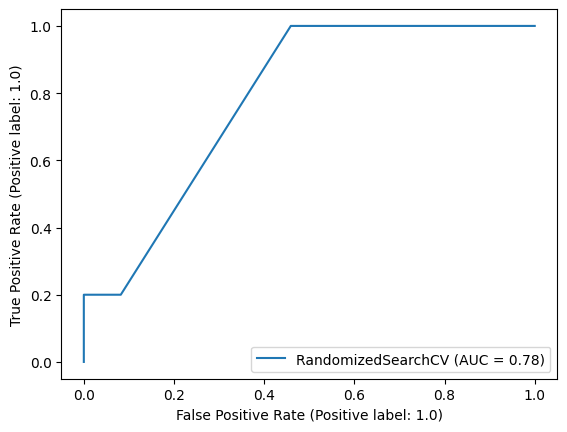

Best params for DecisionTreeClassifier: {'model__splitter': 'best', 'model__min_samples_split': 3, 'model__min_samples_leaf': 6, 'model__max_features': 27, 'model__max_depth': 4, 'model__criterion': 'entropy'}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.7836065573770491
Classification report
              precision    recall  f1-score   support

         0.0     0.9333    0.9180    0.9256        61
         1.0     0.1667    0.2000    0.1818         5

    accuracy                         0.8636        66
   macro avg     0.5500    0.5590    0.5537        66
weighted avg     0.8753    0.8636    0.8693        66

Accuracy: 0.8636
AUC: 0.7836
You'd think it's something close to 0.8036842105263158 but it's actually 0.8160493827160494.


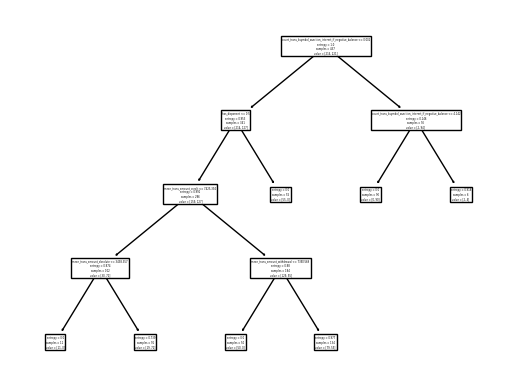

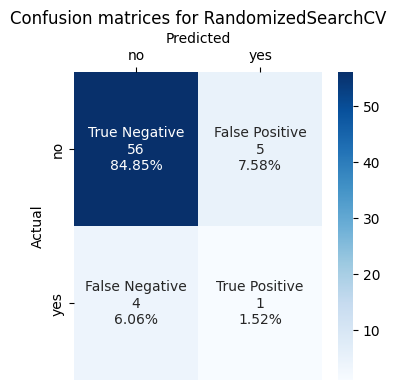

In [21]:
dt = train_and_use_model(
    DecisionTreeClassifier(random_state=42), 
    {
        "model__criterion": ['gini', 'entropy'],
        'model__splitter': ['best', 'random'],
        "model__max_depth": range(1, 15),
        'model__max_features': range(1, len(input_cols)),
        "model__min_samples_split": range(2,15),
        "model__min_samples_leaf": range(1,7)
    },
    n_iter=10,
    oversample=True,
)

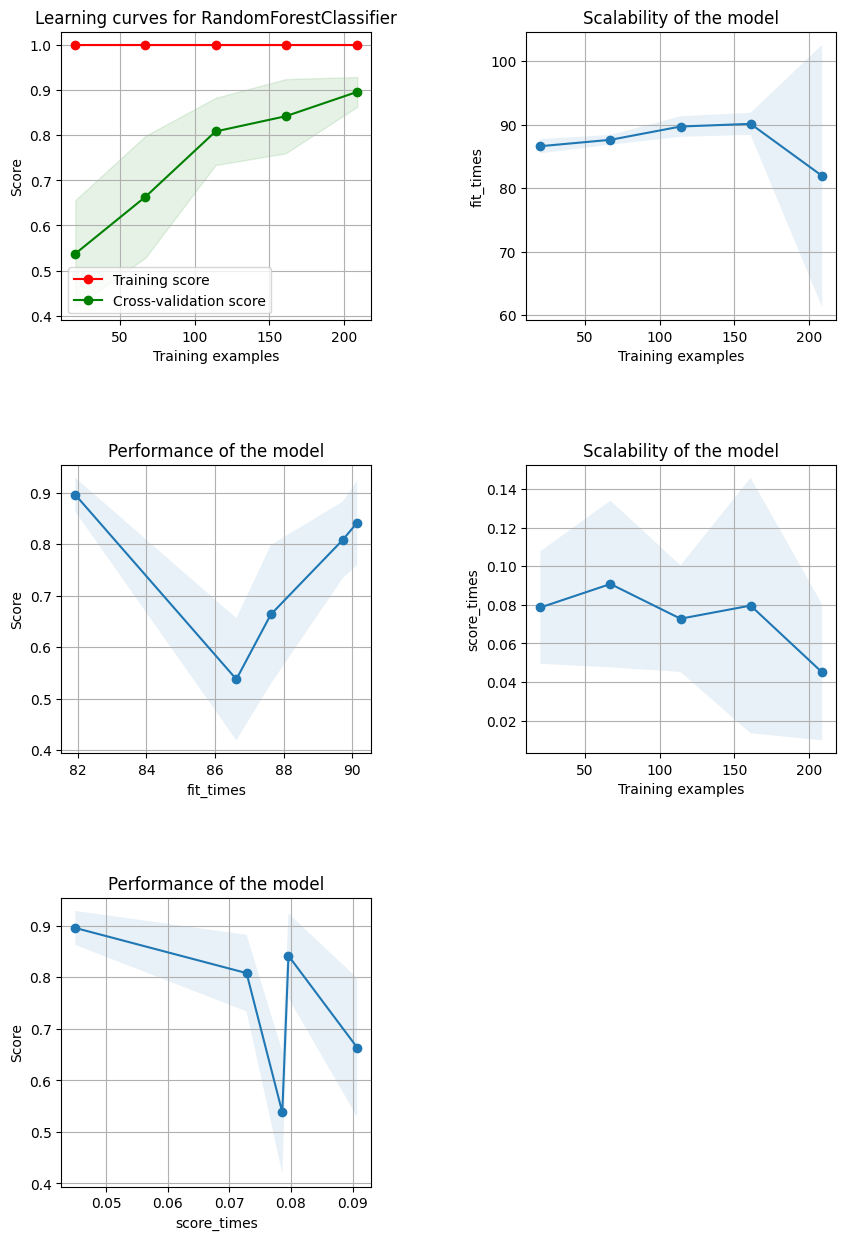

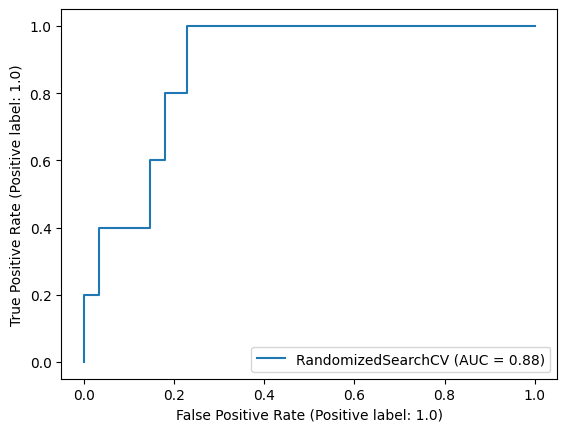

Best params for RandomForestClassifier: {'model__n_estimators': 150, 'model__min_samples_split': 3, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__criterion': 'entropy', 'model__bootstrap': True}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.881967213114754
Classification report
              precision    recall  f1-score   support

         0.0     0.9375    0.9836    0.9600        61
         1.0     0.5000    0.2000    0.2857         5

    accuracy                         0.9242        66
   macro avg     0.7188    0.5918    0.6229        66
weighted avg     0.9044    0.9242    0.9089        66

Accuracy: 0.9242
AUC: 0.8820
You'd think it's something close to 0.906578947368421 but it's actually 0.9192901234567902.


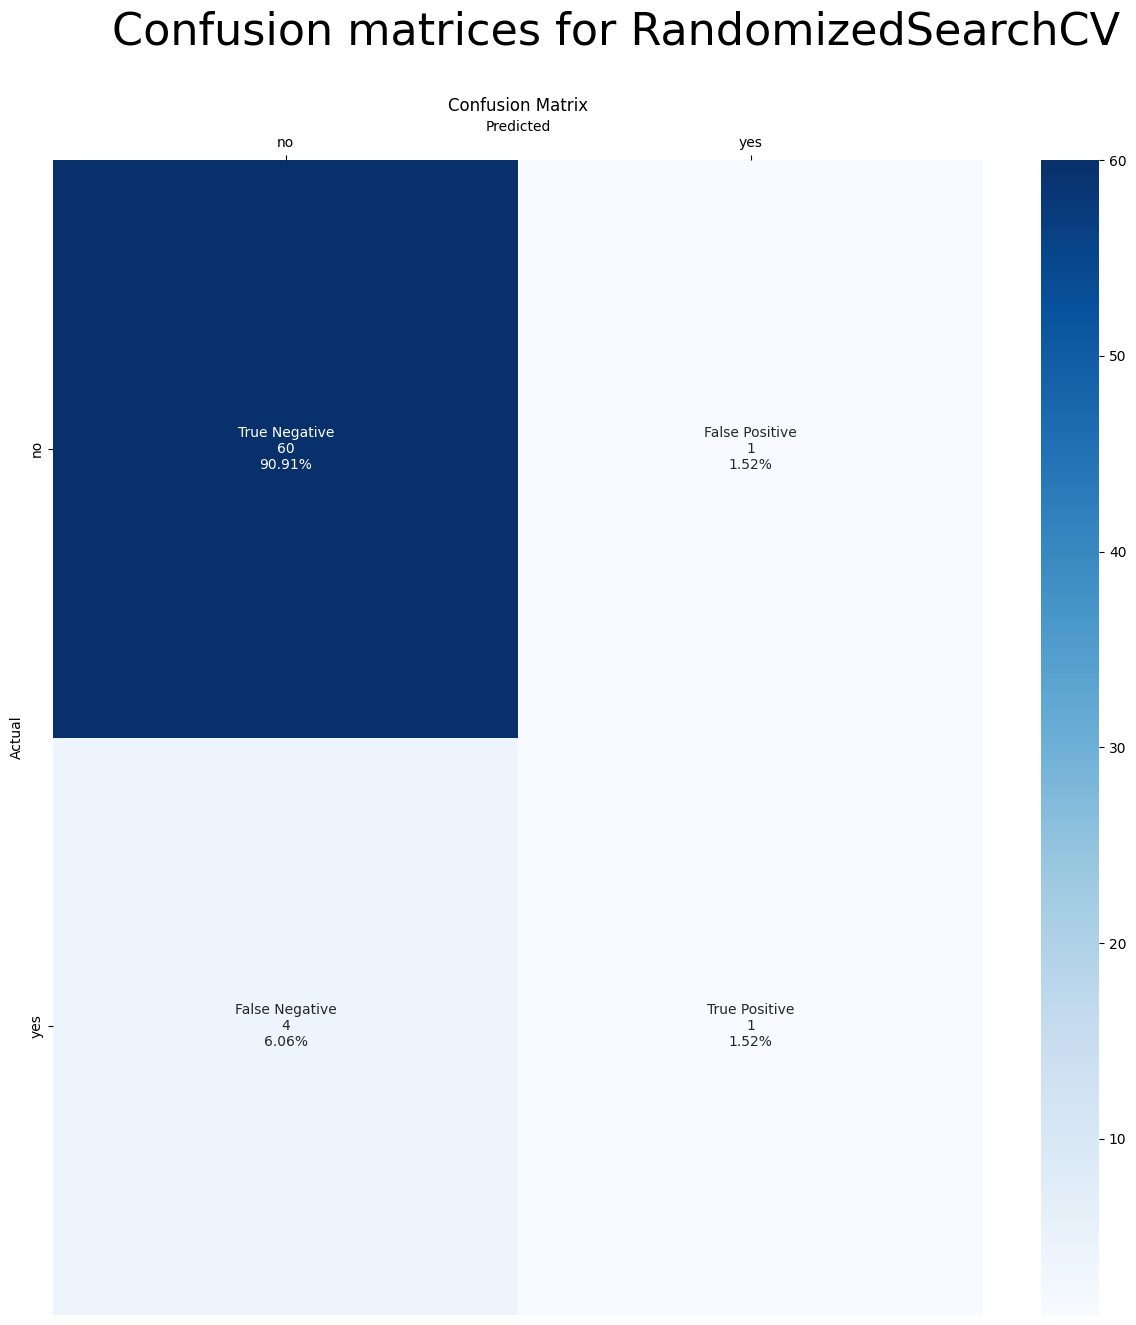

In [29]:
rf = train_and_use_model(
    RandomForestClassifier(), 
    { 
        'model__n_estimators': [100, 150],
        'model__max_features': ['sqrt', 'log2'],
        'model__max_depth' : [8,9,10,11,12],
        'model__criterion' :['gini', 'entropy'],
        'model__bootstrap': [True],
        'model__min_samples_leaf': [1,2,3],
        'model__min_samples_split': [2,3],
    },
    n_iter=50
)

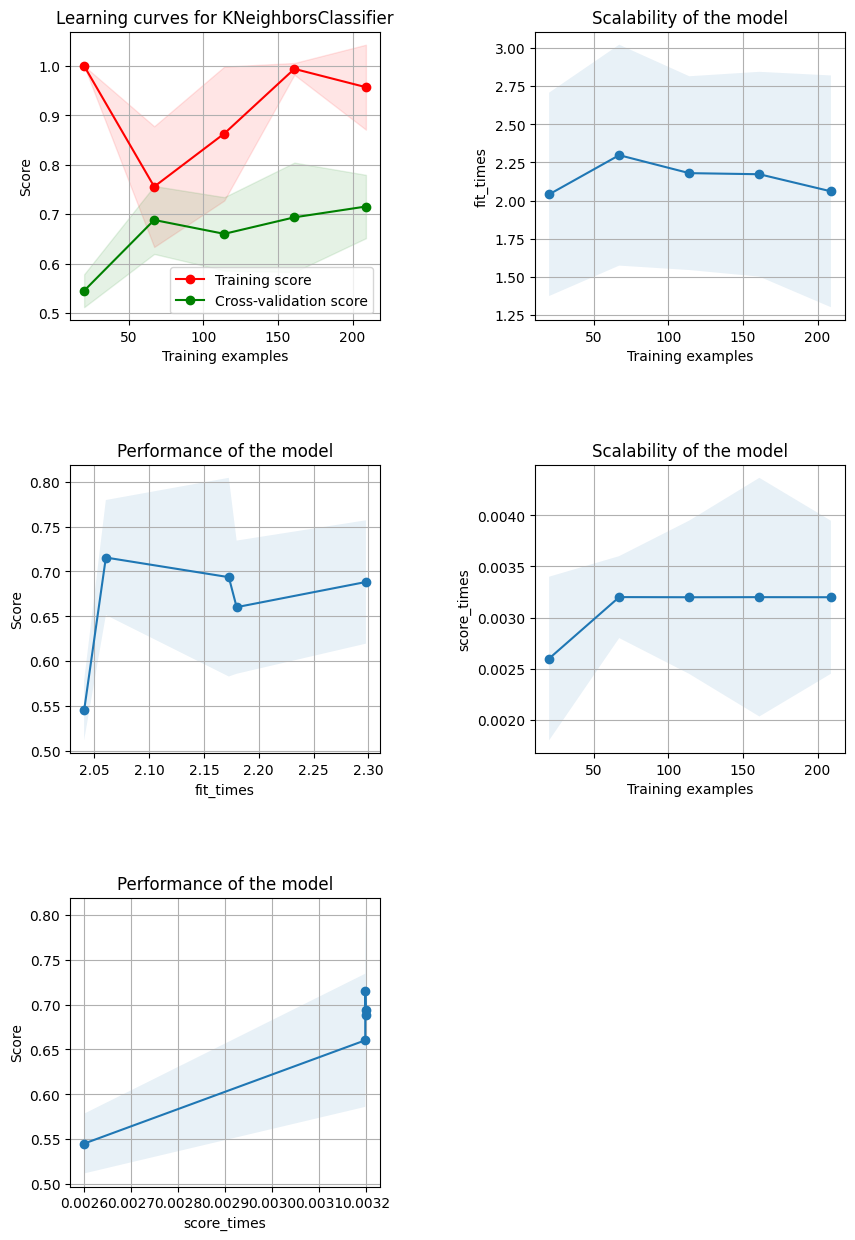

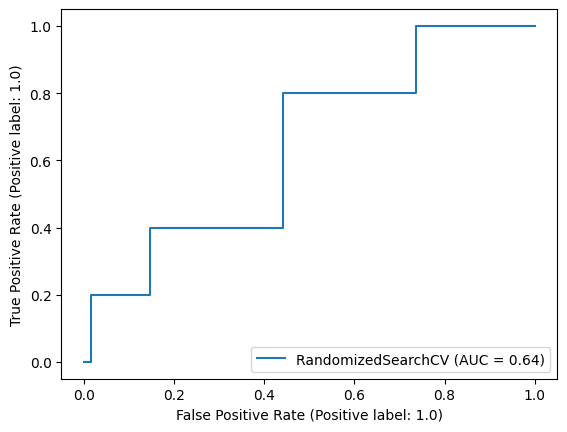

Best params for KNeighborsClassifier: {'model__weights': 'distance', 'model__n_neighbors': 27}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.6426229508196721
Classification report
              precision    recall  f1-score   support

         0.0     0.9242    1.0000    0.9606        61
         1.0     1.0000    0.0000    0.0000         5

    accuracy                         0.9242        66
   macro avg     0.9621    0.5000    0.4803        66
weighted avg     0.9300    0.9242    0.8879        66

Accuracy: 0.9242
AUC: 0.6426
You'd think it's something close to 0.7447368421052633 but it's actually 0.7587448559670782.


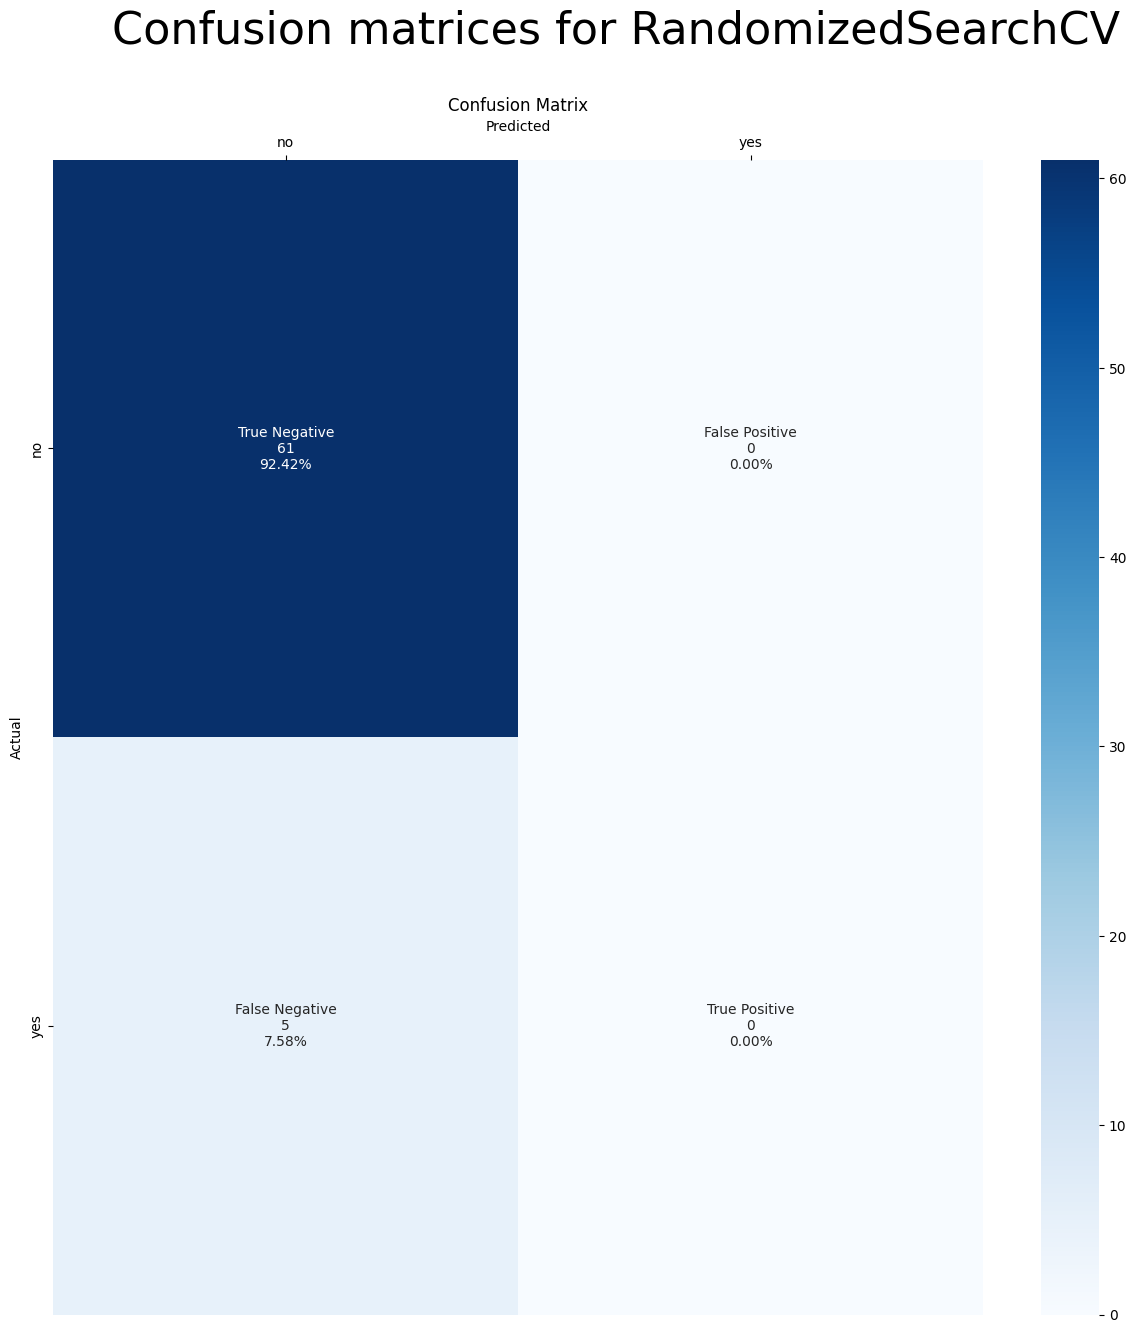

In [30]:
knn = train_and_use_model(
    KNeighborsClassifier(), 
    {
        "model__n_neighbors": list(range(1,31)),
        "model__weights": ['uniform', 'distance'],
    },
    n_iter=50
)

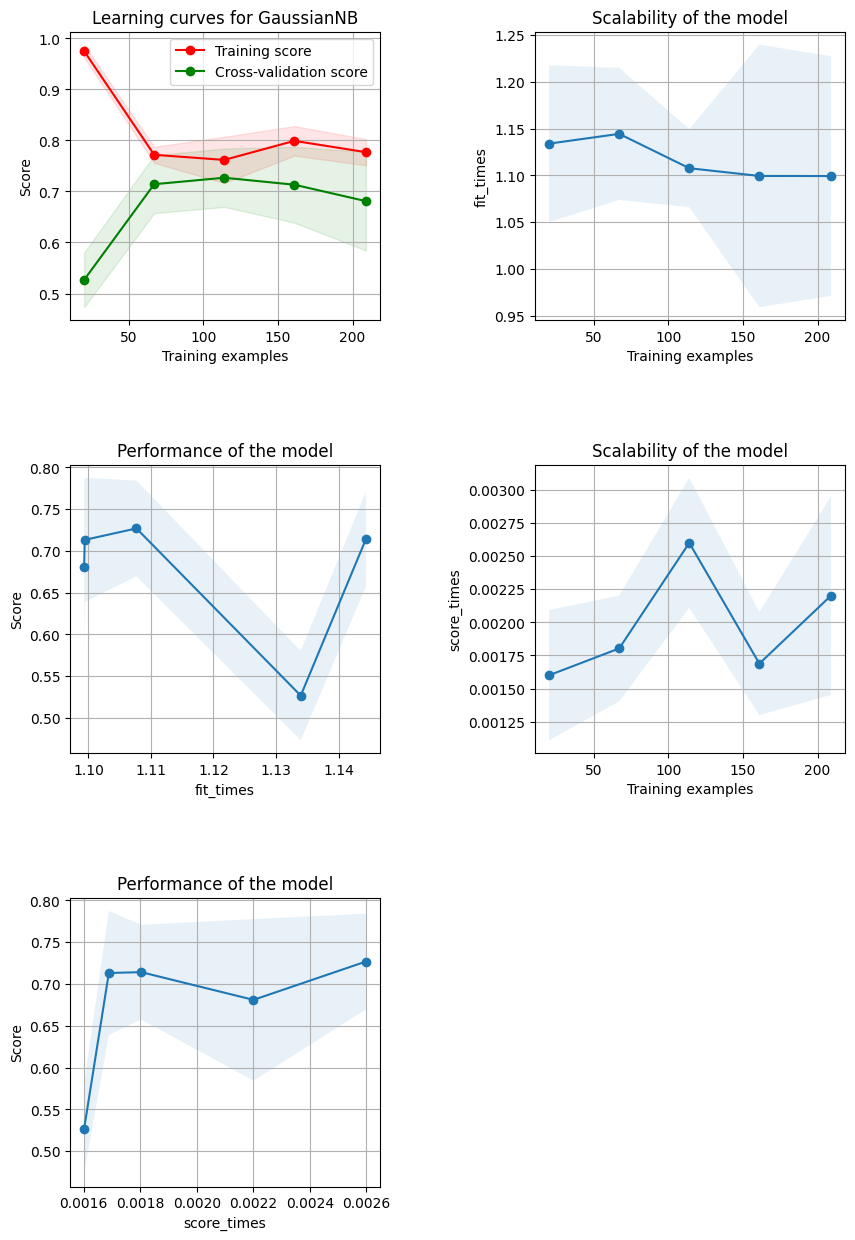

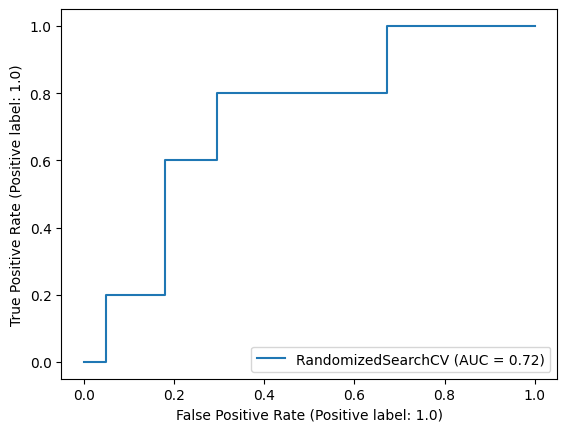

Best params for GaussianNB: {'model__var_smoothing': 2.310129700083158e-06}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.7245901639344263
Classification report
              precision    recall  f1-score   support

         0.0     0.9434    0.8197    0.8772        61
         1.0     0.1538    0.4000    0.2222         5

    accuracy                         0.7879        66
   macro avg     0.5486    0.6098    0.5497        66
weighted avg     0.8836    0.7879    0.8276        66

Accuracy: 0.7879
AUC: 0.7246
You'd think it's something close to 0.6773684210526316 but it's actually 0.6807613168724279.


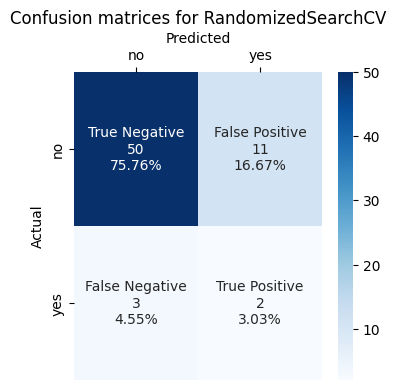

In [26]:
gnb = train_and_use_model(
    GaussianNB(), 
    {
        'model__var_smoothing': np.logspace(0,-9, num=100)
    },
    n_iter=50
)

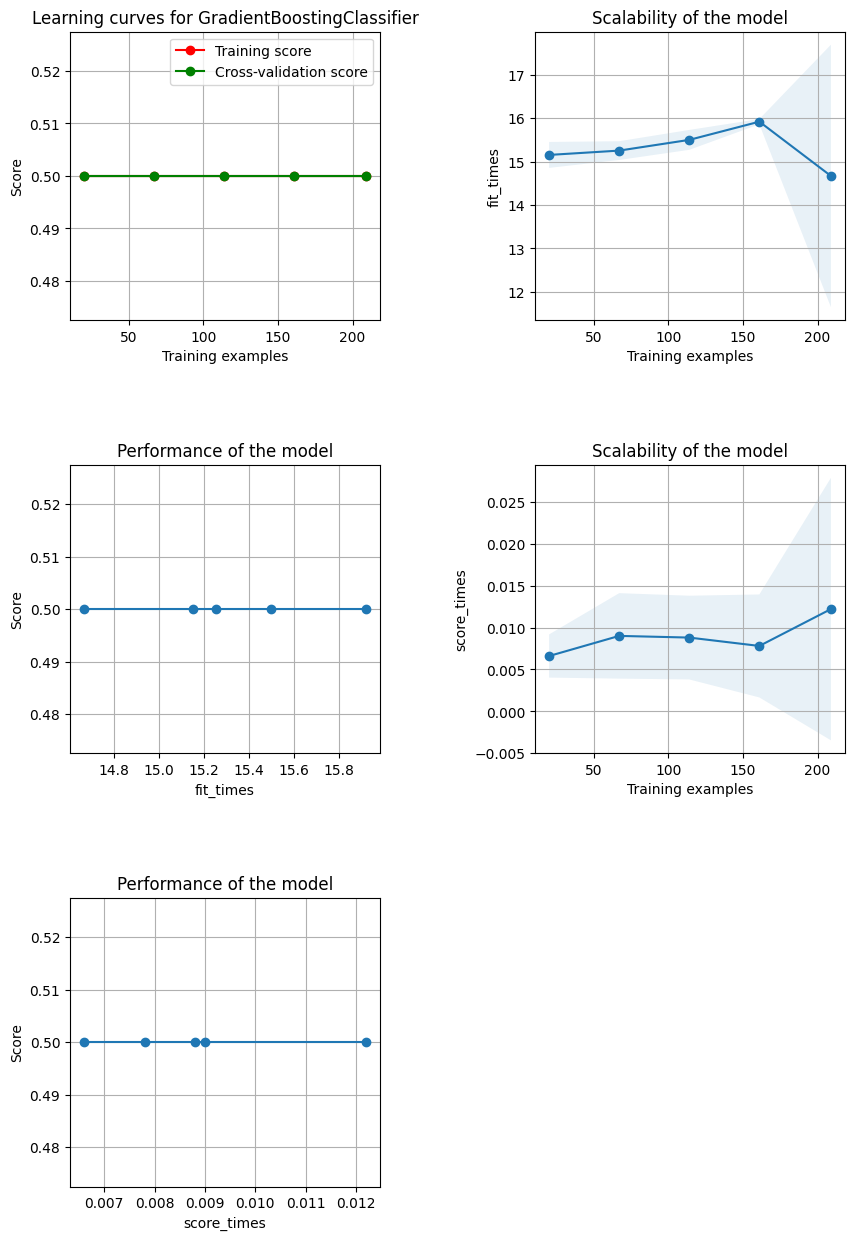

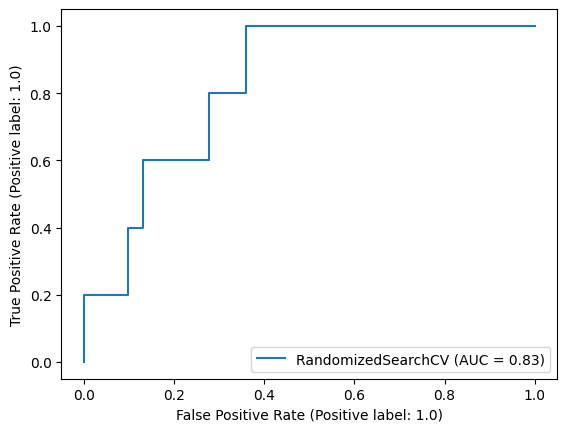

Best params for GradientBoostingClassifier: {'model__min_samples_split': 200, 'model__min_samples_leaf': 30, 'model__max_features': 13, 'model__max_depth': 9}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.8262295081967214
Classification report
              precision    recall  f1-score   support

         0.0     0.9322    0.9016    0.9167        61
         1.0     0.1429    0.2000    0.1667         5

    accuracy                         0.8485        66
   macro avg     0.5375    0.5508    0.5417        66
weighted avg     0.8724    0.8485    0.8598        66

Accuracy: 0.8485
AUC: 0.8262
You'd think it's something close to 0.8539473684210526 but it's actually 0.8727366255144033.


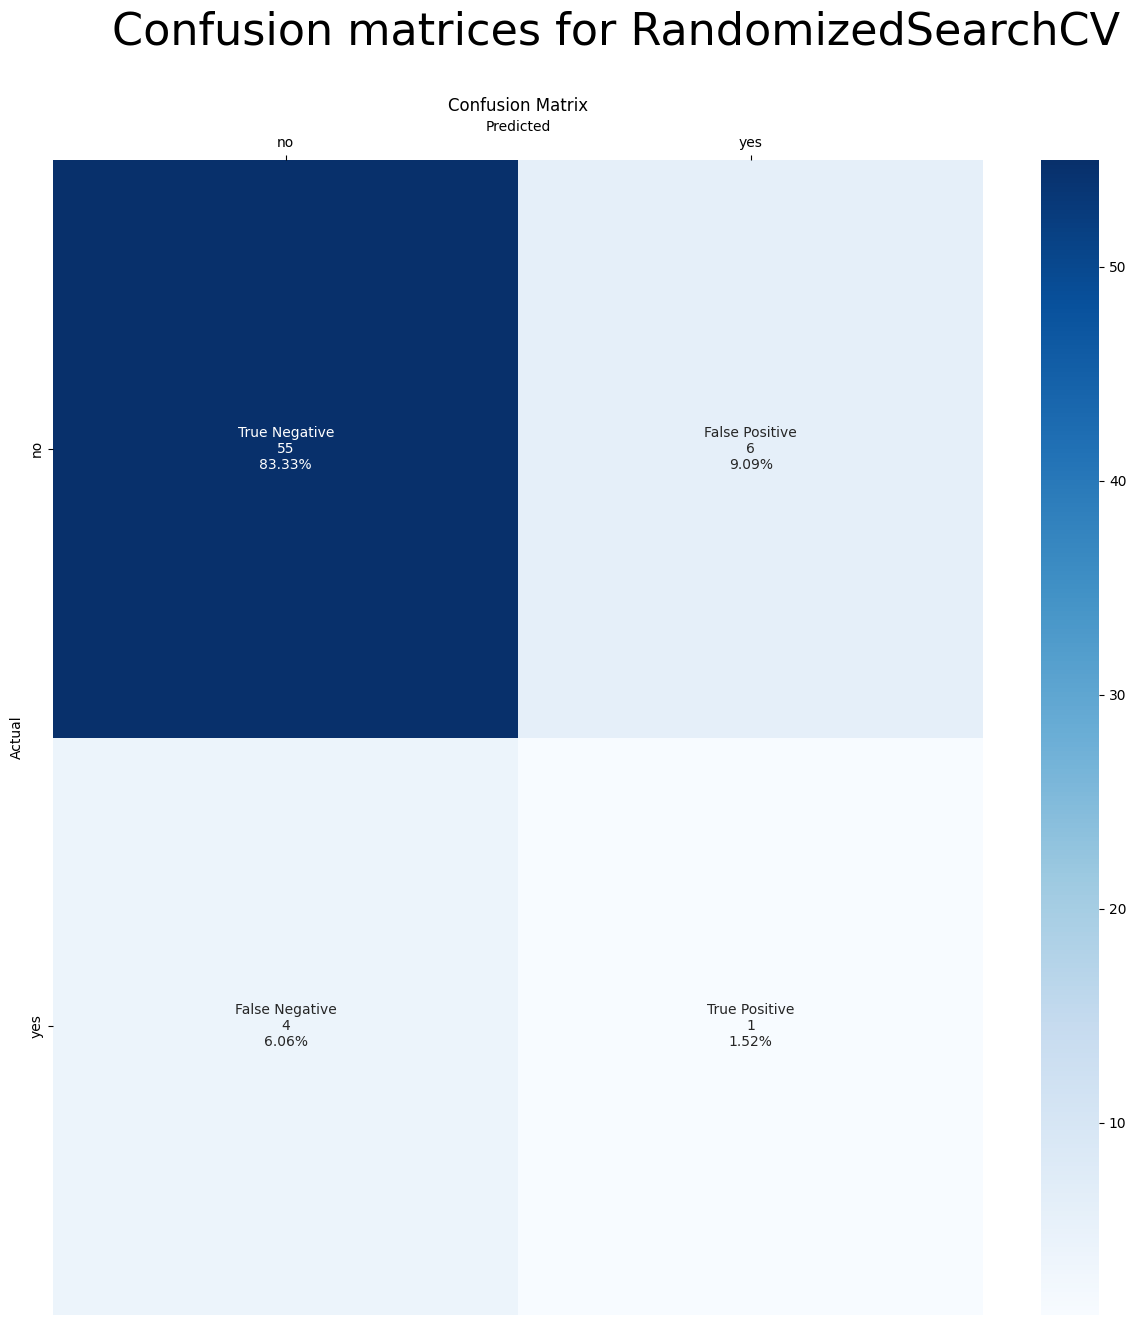

In [32]:
gb = train_and_use_model(
    GradientBoostingClassifier(),
    {
        'model__max_features': range(7,20,2),
        'model__min_samples_split':range(1000,2201,400),
        'model__min_samples_leaf':range(30,71,10),
        'model__max_depth':range(5,16,2),
        'model__min_samples_split':range(200,1001,200)
    },
    n_iter=50
)

c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


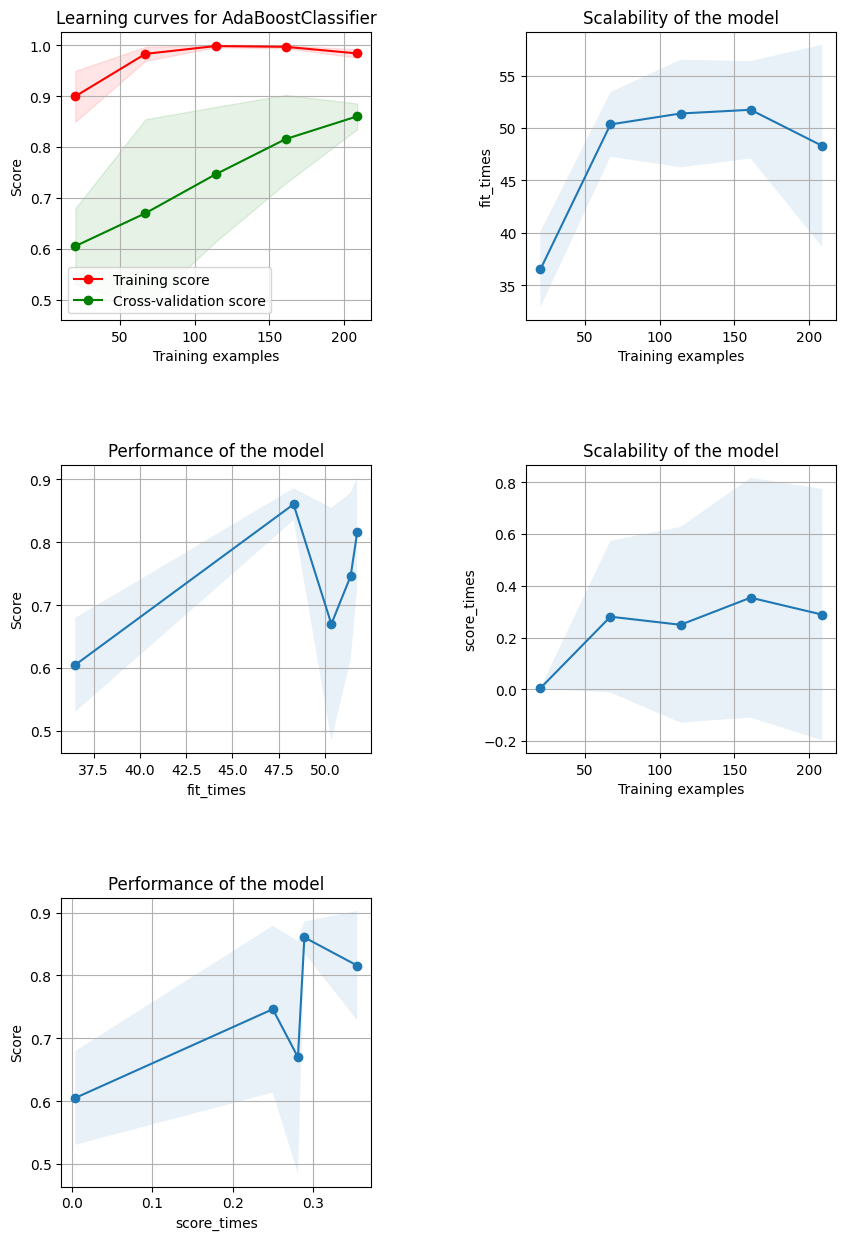

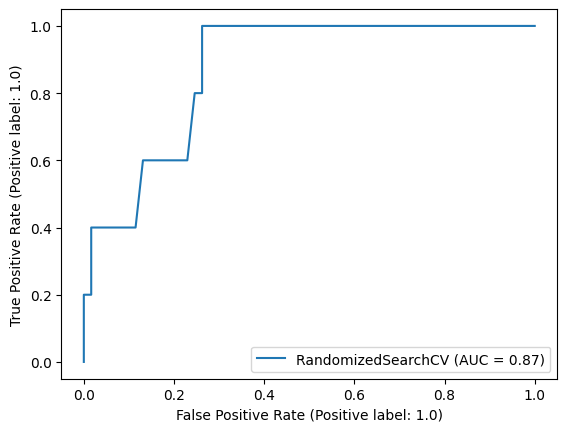

Best params for AdaBoostClassifier: {'model__n_estimators': 500, 'model__learning_rate': 0.01}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.8721311475409836
Classification report
              precision    recall  f1-score   support

         0.0     0.9524    0.9836    0.9677        61
         1.0     0.6667    0.4000    0.5000         5

    accuracy                         0.9394        66
   macro avg     0.8095    0.6918    0.7339        66
weighted avg     0.9307    0.9394    0.9323        66

Accuracy: 0.9394
AUC: 0.8721
You'd think it's something close to 0.94 but it's actually 0.9427983539094651.


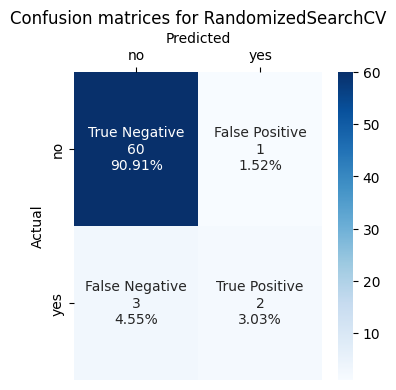

In [25]:
ada = train_and_use_model(
    AdaBoostClassifier(),
    {
        'model__n_estimators': [10,50,100,500],
        'model__learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
    },
    n_iter=50
)

In [11]:
xgb = train_and_use_model(
    XGBClassifier(use_label_encoder=False, eval_metric='aucpr'),
    {
        'model__eta': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
        'model__gamma': [0, 1, 5, 10, 100, 1000],
        'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'model__min_child_weight': [1, 3, 5, 7],
        'model__max_delta_step': [0, 0.2, 0.6, 1, 2],
        'model__subsample': [0.6, 0.7, 0.8, 0.9, 1],
        'model__sampling_method': ['uniform', 'gradient_based'],
        'model__scale_pos_weight': [1, 3, 5, 7, 9],
        'model__max_bin': [16, 32, 64, 128, 256, 512],
    },
    n_iter=50,
    oversample=True
)

c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


TypeError: train_and_use_model() got an unexpected keyword argument 'oversampling'

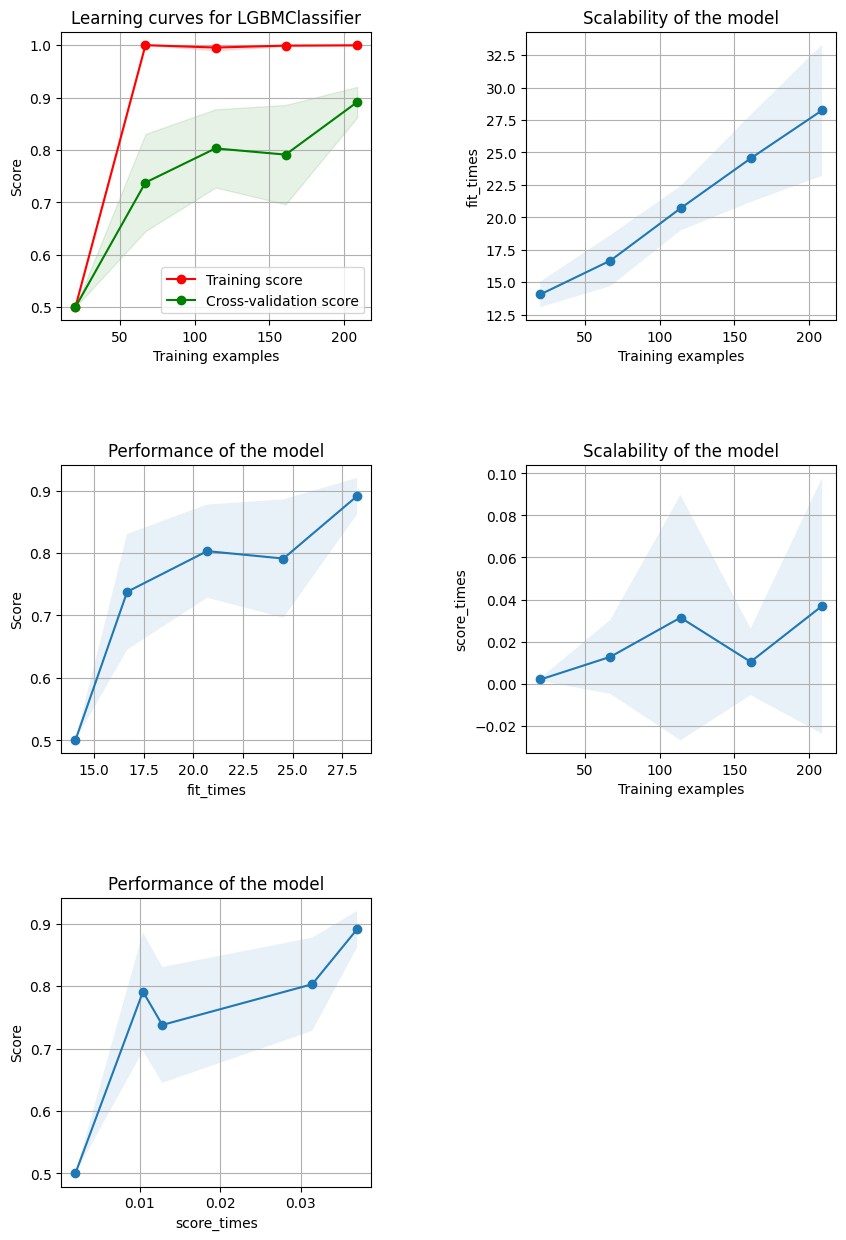

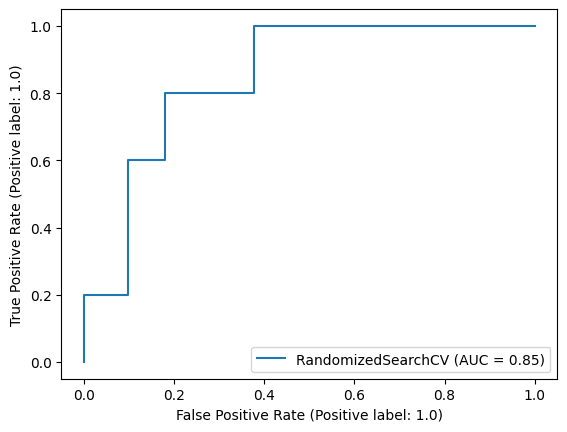

Best params for LGBMClassifier: {'model__subsample_for_bin': 400000, 'model__num_leaves': 31, 'model__n_estimators': 50, 'model__min_child_samples': 20, 'model__max_depth': 10, 'model__learning_rate': 0.1}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.8491803278688524
Classification report
              precision    recall  f1-score   support

         0.0     0.9355    0.9508    0.9431        61
         1.0     0.2500    0.2000    0.2222         5

    accuracy                         0.8939        66
   macro avg     0.5927    0.5754    0.5827        66
weighted avg     0.8836    0.8939    0.8885        66

Accuracy: 0.8939
AUC: 0.8492
You'd think it's something close to 0.8392105263157895 but it's actually 0.8547325102880658.


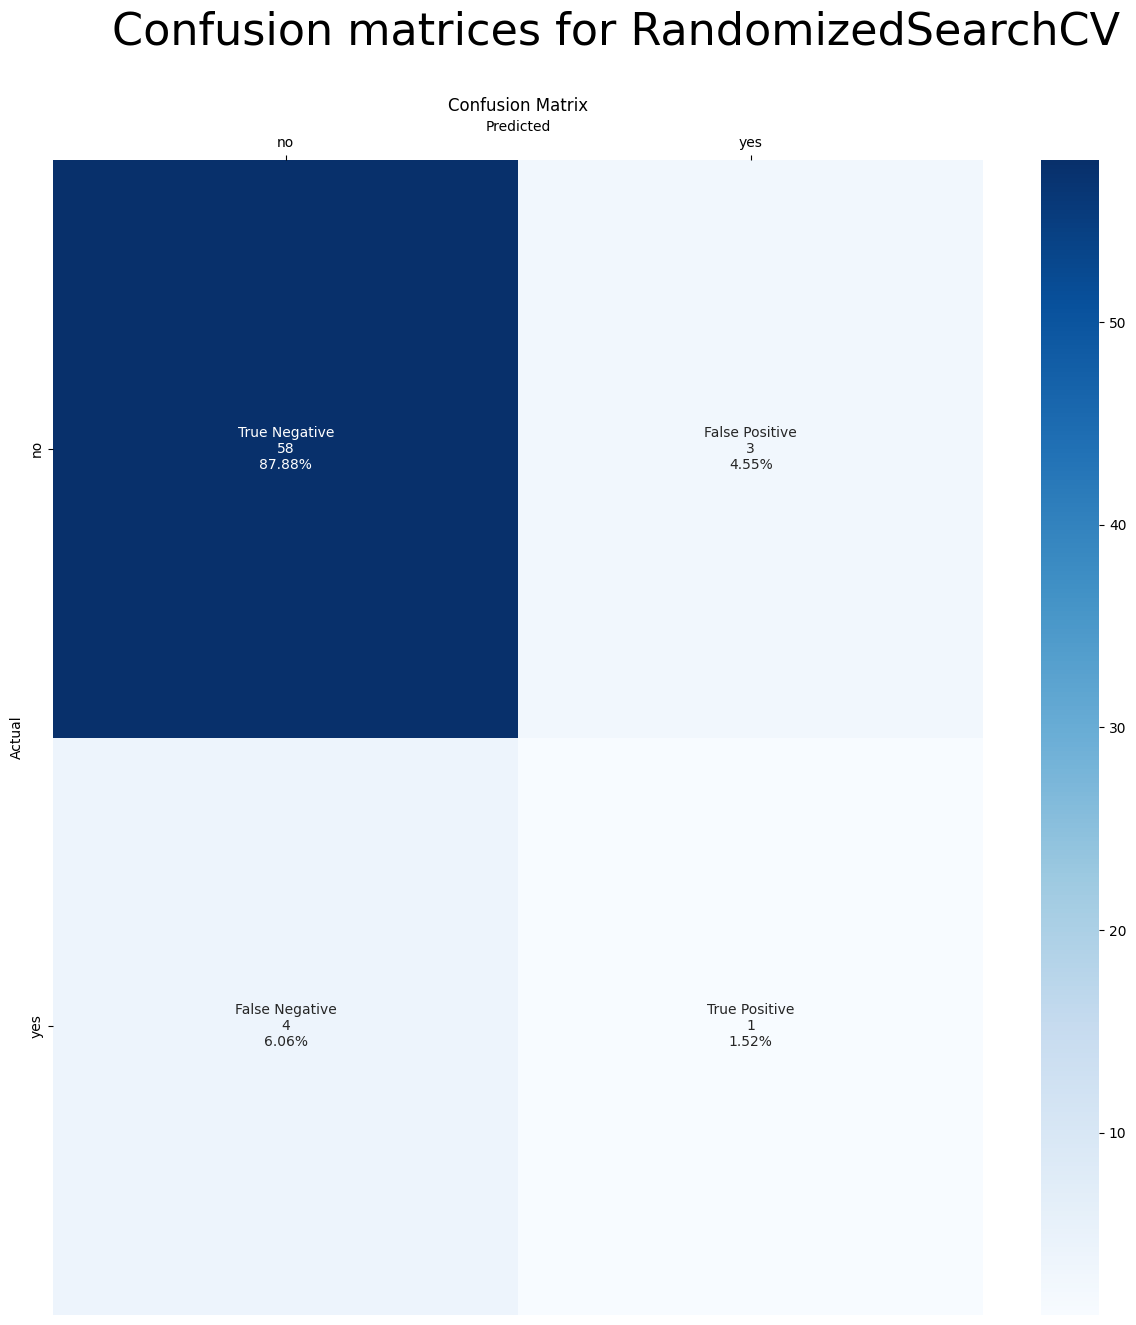

In [12]:
lgb = train_and_use_model(
    LGBMClassifier(),
    {
        'model__num_leaves': [31, 63, 127, 255, 511, 1023],
        'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'model__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
        'model__n_estimators': [10, 50, 100, 500, 1000, 2000],
        'model__subsample_for_bin': [200000, 300000, 400000, 500000],
        'model__min_child_samples': [20, 30, 40, 50],
    },
    n_iter=50
)

```json
{
    'model__n_estimators': 100,
    'model__min_samples_split': 3,
    'model__min_samples_leaf': 2, 
    'model__max_features': 'sqrt', 
    'model__max_depth': 9, 
    'model__criterion': 'entropy', 
    'model__bootstrap': True
}
```

c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

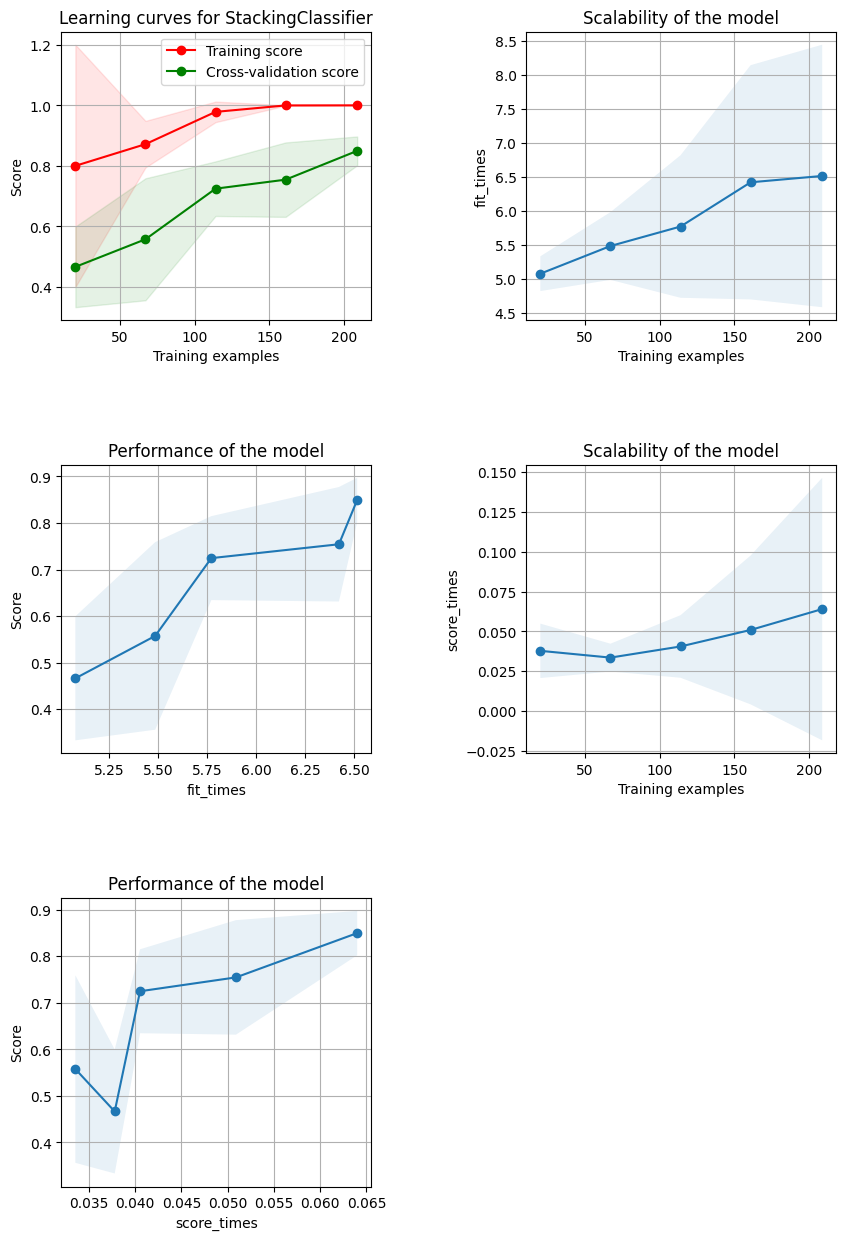

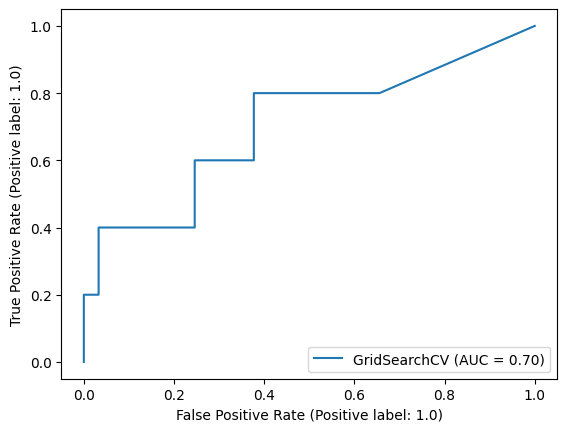

Best params for StackingClassifier: {}
Evaluation metrics for GridSearchCV
GridSearchCV's default score metric: 0.7032786885245902
Classification report
              precision    recall  f1-score   support

         0.0     0.9500    0.9344    0.9421        61
         1.0     0.3333    0.4000    0.3636         5

    accuracy                         0.8939        66
   macro avg     0.6417    0.6672    0.6529        66
weighted avg     0.9033    0.8939    0.8983        66

Accuracy: 0.8939
AUC: 0.7033
You'd think it's something close to 0.8610526315789473 but it's actually 0.8690843621399178.


StackingClassifier(cv=4,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', DecisionTreeClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamm...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42, ...)),
                               ('lgbm', LGBMClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=9,
                                                          min_samples_leaf=2,
                                                          min_samples_split=3,
                                                          random_state=42))

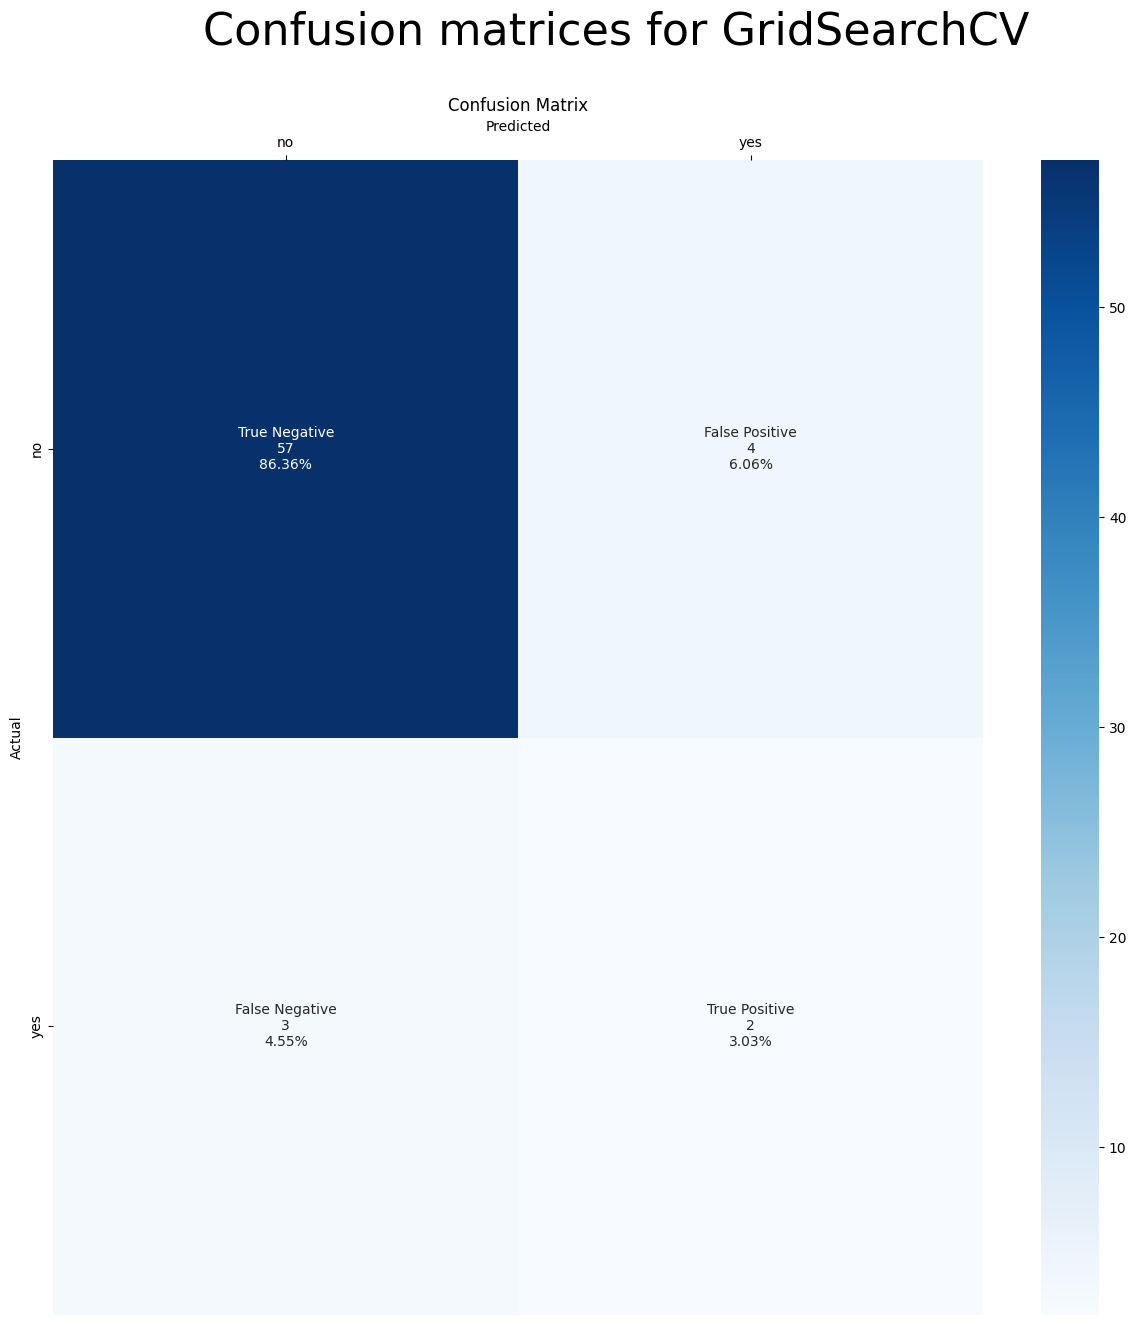

In [14]:
level0 = list()
level0.append(('lr', LogisticRegression(random_state=42) ))
level0.append(('rf', DecisionTreeClassifier(random_state=42)))
level0.append(('xgb', XGBClassifier(random_state=42)))
level0.append(('lgbm', LGBMClassifier(random_state=42)))

level1 = RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=9, bootstrap=True, criterion='entropy', random_state=42)
clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)

train_and_use_model(clf, {})

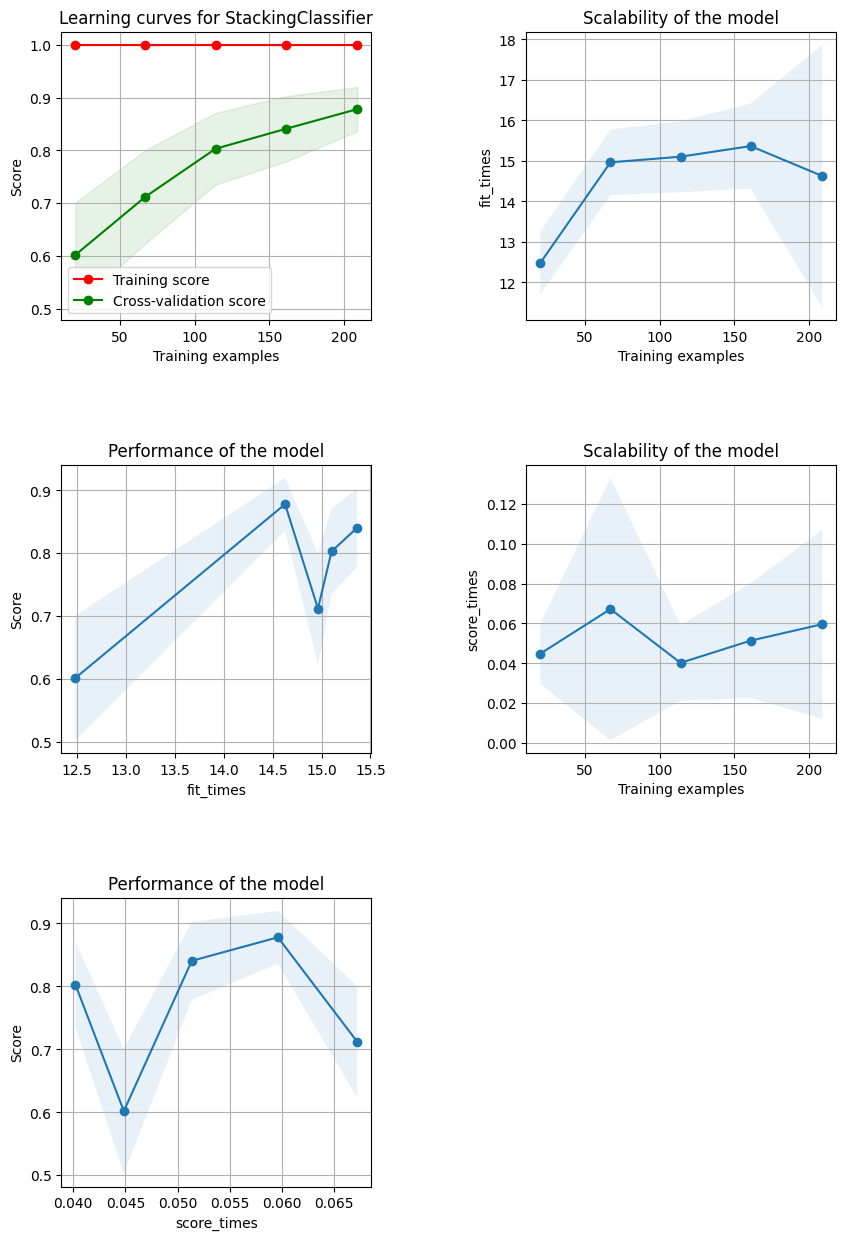

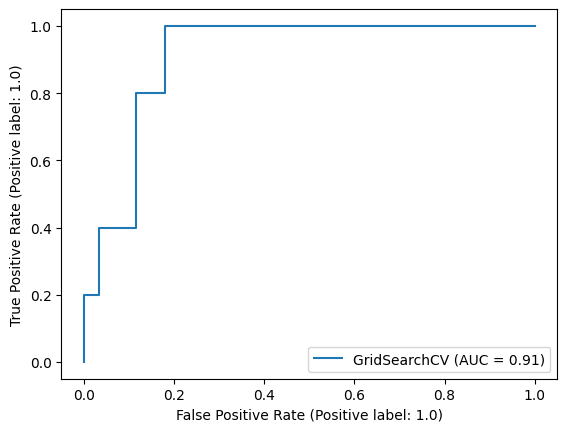

Best params for StackingClassifier: {}
Evaluation metrics for GridSearchCV
GridSearchCV's default score metric: 0.9114754098360656
Classification report
              precision    recall  f1-score   support

         0.0     0.9385    1.0000    0.9683        61
         1.0     1.0000    0.2000    0.3333         5

    accuracy                         0.9394        66
   macro avg     0.9692    0.6000    0.6508        66
weighted avg     0.9431    0.9394    0.9202        66

Accuracy: 0.9394
AUC: 0.9115
You'd think it's something close to 0.9397368421052632 but it's actually 0.9404320987654321.


StackingClassifier(estimators=[('adb', AdaBoostClassifier(random_state=42)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=9,
                                                       min_samples_leaf=2,
                                                       min_samples_split=3,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

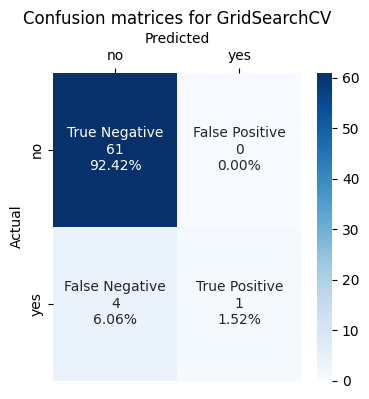

In [24]:
estimators = [
    ('adb', AdaBoostClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=9, bootstrap=True, criterion='entropy', random_state=42)),
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

train_and_use_model(clf, {})

In [13]:
model = LogisticRegression()
use_model(model, transformed=True)


You'd think it's something close to 0.40815789473684216 but it's actually 0.6512345679012346.


LogisticRegression()

In [19]:
inputs = data_transformed[input_cols].values
classes = data_transformed[output_cols].values
best_result = 0
best_result_df = None
for i in range(500):
    model = RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=9, bootstrap=True, criterion='entropy')

    model.fit(inputs, classes)

    inputs_comp = competition_transformed[input_cols].values
    results = competition_transformed[['Id', 'Predicted']].copy()
    results['Predicted'] = (model.predict_proba(inputs_comp))[:, 1]
    results.set_index('Id', inplace=True)
    res = evaluate_result(results)
    if (res > best_result):
        best_result = res
        best_result_df = results.copy()
        
evaluate_result(best_result_df)
print(best_result)
modelname = f'{datetime.datetime.now().strftime("%Y_%m_%d_T%HH_%MM_%SS")}_{model.__class__.__name__}_results'
best_result_df.to_csv(f'output/predictive/{modelname}.csv', index=True)

      Predicted
Id             
5895   0.016034
7122   0.465833
6173   0.033459
6142   0.017533
5358   0.116563
You'd think it's something close to 0.9244736842105262 but it's actually 0.9292181069958848.
      Predicted
Id             
5895   0.025798
7122   0.531066
6173   0.063137
6142   0.020000
5358   0.160833
You'd think it's something close to 0.9221052631578948 but it's actually 0.919650205761317.
      Predicted
Id             
5895   0.026951
7122   0.444167
6173   0.060357
6142   0.018283
5358   0.210167
You'd think it's something close to 0.9226315789473685 but it's actually 0.9258230452674897.
      Predicted
Id             
5895   0.009224
7122   0.527000
6173   0.033412
6142   0.010057
5358   0.204119
You'd think it's something close to 0.9168421052631579 but it's actually 0.9162551440329219.
      Predicted
Id             
5895   0.020444
7122   0.520583
6173   0.001667
6142   0.000323
5358   0.246095
You'd think it's something close to 0.9152631578947369 but it's actua